In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import spacy
from spacy.lang.es.examples import sentences 
from gensim.models import CoherenceModel

nlp = spacy.load('C:\ProgramData\Miniconda3\Lib\site-packages\es_core_news_lg\es_core_news_lg-3.2.0')

In [33]:
tweets = pd.read_csv("tweets_volcan_es_2.csv",  names=['tweet'], encoding='latin-1')
tweets = tweets.dropna()
tweets.columns = [ 'text']

tweets.drop_duplicates(subset ='text', keep = False, inplace = True) 
tweets.head()

,text
1,b'@rajote Ciertamente no veo protestas por el ...
2,"b'Terremoto de 4,9 en la isla espanola del vol..."
3,b'@EmmaRincon Por favor no puedo leer estas co...
4,"b'Ademas, el sismografo del Instituto Geografi..."
5,"b'Con respecto a que estadio pesa mas,si el vo..."


In [34]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 1 to 5626
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5512 non-null   object
dtypes: object(1)
memory usage: 86.1+ KB


C:\Users\ivanl\AppData\Local\Temp/ipykernel_1139548/1658094711.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['text'] = tweets['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


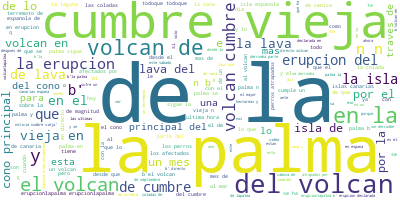

In [35]:
import re
# Remove punctuation

tweets['text'] = \
tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweets['text'] = tweets['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
#tweets['cleanLinks'] = tweets['Links'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
# Convert the titles to lowercase
tweets['text'] = \
tweets['text'].map(lambda x: x.lower())

# Remove stop words?¿?¿?¿
#import re
#from nltk.corpus import stopwords

#important_words=[]
#for paper in papers:
 #   if paper not in stopwords.words('spanish'):
  #      important_words.append(papers)

#print (important_words)

# Print out the first rows of papers
tweets['text'].head()
#!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.

long_string = ','.join(list(tweets['text'].values))
#long_string = ','.join(list(papers['important_words'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [36]:
from spacy.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
from nltk.tokenize import word_tokenize
all_stopwords = nlp.Defaults.stop_words
print(all_stopwords)

#final_stopwords_list = list(es_stop) 
#tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words=final_stopwords_list, use_idf=True, tokenizer=nlp.tokenizer)

tokenizer = nlp.tokenizer
aux=word_tokenize(long_string)
text_tokens = tokenizer(long_string)
print(len(text_tokens))
#print(text_tokens)
tokens_without_sw= [word for word in aux if not word in all_stopwords]
print(len(tokens_without_sw))

#print(tokens_without_sw)
#tokens_without_sw= [word for word in tfidf_vectorizer if not word in all_stopwords]
#print(tokens_without_sw)

{'conseguimos', 'ese', 'parte', 'principalmente', 'dónde', 'estan', 'mía', 'deprisa', 'nuestro', 'vez', 'aquél', 'hablan', 'modo', 'fuera', 'estas', 'total', 'sabeis', 'contigo', 'hemos', 'intentais', 'peor', 'través', 'demasiado', 'encuentra', 'usamos', 'arriba', 'te', 'pues', 'tarde', 'sean', 'ver', 'todavía', 'verdad', 'suyas', 'ningunas', 'nosotras', 'con', 'dias', 'indicó', 'así', 'muchas', 'tuya', 'aquéllas', 'cerca', 'junto', 'nunca', 'fin', 'por', 'pesar', 'dentro', 'final', 'durante', 'una', 'aunque', 'tendrá', 'siendo', 'aqui', 'otro', 'últimas', 'otras', 'cierto', 'queremos', 'lleva', 'diferentes', 'mediante', 'antaño', 'bien', 'siempre', 'mientras', 'quién', 'mismos', 'podriamos', 'podriais', 'dijo', 'segundo', 'haceis', 'míos', 'antes', 'cual', 'habla', 'empleais', 'contra', 'haciendo', 'fue', 'otra', 'pasado', 'claro', 'última', 'parece', 'ayer', 'siguiente', 'propios', 'todas', 'podrian', 'cuantos', 'hacerlo', 'cuanta', 'señaló', 'tuyas', 'ahi', 'diferente', 'del', 'much

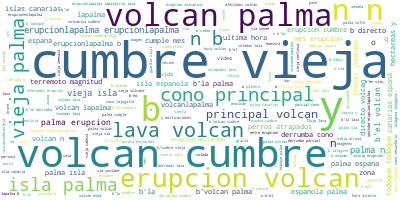

In [37]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
unique_string=(" ").join(tokens_without_sw)
#wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
# Generate a word cloud
#text2= "".join(tokens_without_sw)
#text2 = bytearray([self.byte_decoder[c] for c in text]).decode("utf-8", errors=self.errors)
#long_string2 = ','.join(list(tokens_without_sw['paper_text_processed'].values))
#!pip install nltk
#text2=''.join(token.text_with_ws for token in tokens_without_sw)
#from nltk.tokenize.treebank import TreebankWordDetokenizer
#text2=TreebankWordDetokenizer().detokenize([tokens_without_sw])
wordcloud.generate(unique_string)
# Visualize the word cloud
wordcloud.to_image()

In [38]:
new_stop_words={'nosotras', 'sí', 'último', 'agregó', 'hizo', 'varias', 'pasado', 'estado', 'sea', 'un', 'era', 'cuantas',
                'alguno', 'habia', 'aunque', 'enseguida', 'debido', 'mia', 'que', 'pero', 'para', 'allí', 'cuales', 'despues', 'segun',     #
                'nos', 'estan', 'sabemos', 'emplean', 'será', 'tercera', 'todos', 'tuvo', 'dar', 'sabe', 'aún', 'medio', 'próximos', 'tú', 'me',    #
                'cual', 'delante', 'ejemplo', 'cuánta', 'está', 'conocer', 'quien', 'salvo', 'vais', 'contra', 'bueno', 'nuestra', 'ocho', 'expresó', #
                'hoy', 'solos', 'tenga', 'tarde', 'sido', 'verdadera', 'propios', 'mismas', 'tengo', 'ninguna', 'mio', 'dias', 'aquél', 'vaya', 
                'solamente', 'ahí', 'pocas', 'final', 'considera', 'hago', 'en', 'yo', 'cierto', 'otro', 'dio', 'cuatro', 'deben', 'última', 'algunos', #
                'los', 'incluso', 'pues', 'todavia', 'queremos', 'tu', 'voy', 'eran', 'nada', 'dentro', 'aquello', 'emplear', 'partir', 'temprano', #
                'nosotros', 'sin', 'mientras', 'general', 'haber', 'debajo', 'habrá', 'he', 'hicieron', 'ser', 'cierta', 'ese', 'quiza', 'menudo', 'su', #
                'apenas', 'ésta', 'ni', 'éstos', 'parece', 'quizas', 'unos', 'ellas', 'consiguen', 'del', 'sera', 'ti', 'cuantos', 'estuvo', # intentan
                'cómo', 'segunda', 'poner', 'así', 'porque', 'que', 'veces', 'ciertas', 'aquélla', 'tres', 'casi', 'estar', 'encuentra', 'uno', 'pronto', #
                'dijeron', 'ante', 'habían', 'aqui', 'realizado', 'creo', 'primera', 'saber', 'les', 'comentó', 'algo', 'empleas', 'sobre', 'sino', 'hubo',#
                'vosotros', 'decir', 'esta', 'puedo', 'algunas', 'luego', 'vuestras', 'fueron', 'mismo', 'dice', 'haciendo', 'podrán', #nuevas, mayor?
                'respecto', 'estaba', 'según', 'usa', 'míos', 'eramos', 'podrian', 'tuya', 'hecho', 'cosas', 'ambos', 'vez', 'propias', # próximo, grandes
                'hacerlo', 'quiere', 'cuáles', 'ayer', 'trabajamos', 'bajo', 'nadie', 'saben', 'mias', 'buena', 'cuando', 'ya', 'quiénes', 'afirmó', 'paìs', #
                'embargo', 'tienen', 'estos', 'tuyas', 'éste', 'da', 'consideró', 'somos', 'cuenta', 'asi', 'vuestro', 'poco', 'ahi', 'hacer', 'todavía', 'va', #
                'usamos', 'realizar', 'mismos', 'quienes', 'tal', 'aquel', 'una', 'haceis', 'durante', 'esos', 'valor', 'cuanta', 'diferente', #varios
                'igual', 'todas', 'tus', 'como', 'estamos', 'realizó', 'soyos', 'otras', 'tenemos', 'debe', 'lugar', 'sus', 'tendrán', #trabajar, pocos
                'sean', 'esa', 'ahora', 'principalmente', 'propia', 'quizá', 'quién', 'toda', 'dicho', 'ella', 'ello', 'muchas', 'tuyo', 'el', 'más', 'ver', #
                'sigue', 'horas', 'demasiado', 'manifestó', 'dos', 'siguiente', 'tanto', 'lo', 'parte', 'desde', 'consigues', 'arriba', 'dia', 'podeis', #
                'poder', 'van', 'dijo', 'trata', 'siempre', 'cuanto', 'detrás', 'quedó', 'adelante', 'entre', 'pasada', 'ex', 'podrias', #intentamos
                'no', 'vuestra', 'consigue', 'después', 'eso', 'raras', 'eras', 'estará', 'mediante', 'actualmente', 'nuestro', 'es',
                'supuesto', 'algún', 'estoy', 'primero', 'aun', 'buen', 'antano', 'dado', 'puede', 'tenido', 'os', 'todo', 'cuál', 'muy', 'habla', #trabajas
                'mencionó', 'intenta', 'sabes', 'atras', 'esas', 'excepto', 'manera', 'adrede', 'solas', 'nuestros', 'unas', 'verdad', 'contigo', 'mucha', #
                'cerca', 'ampleamos', 'intento', 'día', 'ustedes', 'cualquier', 'ésas', 'haces', 'siendo', 'menos', 'qué', 'existen', 'ellos', 'han', #ningún
                'donde', 'modo', 'fuimos', 'detras', 'se', 'dan', 'sé', 'tras', 'hay', 'usais', 'le', 'estais', 'proximo', #dejó, despacio, últimos, último
                'lleva', 'junto', 'nuestras', 'ningunas', 'otra', 'repente', 'arribaabajo', 'pueden', 'mios', 'antes', 'poca', 'tiempo', 'segundo', 'de', 'informo', #
                'consigo', 'por', 'seis', 'días', 'hacia', 'suya', 'usted', 'podrían', 'cuántos', 'mal', 'aquellas', 'conmigo', #trabajais, empleais, 
                'estados', 'tiene', 'vamos', 'podria', 'entonces', 'demás', 'mí', 'ir', 'éstas', 'tenía', 'cuándo', 'hablan', 'siete', 'teneis',
                'con', 'ése', 'otros', 'sois', 'usan', 'fuera', 'aquella', 'breve', 'soy', 'dicen', 'podriamos', 'alguna', 'antaño', 'son', 'uso',#trabajo, 
                'hacemos', 'podrá', 'indicó', 'hasta', 'aproximadamente', 'podriais', 'estas', 'serán', 'además', 'conseguir', 'dónde', 'este', 'lado', 'ésa',#
                'mía', 'mío', 'están', 'suyo', 'quizás', 'fui', 'también', 'tampoco', 'ademas', 'aquéllos', 'verdadero', 'nuevo', 'al',#mejor, buenas, 
                'mis', 'llevar', 'tan', 'explicó', 'mi', 'sería', 'anterior', 'usar', 'ningunos', 'nuevos', 'primer', 'eres', 'posible', 'cuántas', 'ciertos',#
                'añadió', 'intentar', 'si', 'llegó', 'encima', 'pudo', 'misma', 'podemos', 'te', 'aquellos', 'deprisa',
                'hace', 'aseguró', 'momento', 'través', 'bueno', 'señaló', 'sabeis', 'fin', 'total', 'conseguimos', 'la', 'diferentes', 'estaban',#lejos
                'había', 'informó', 'mías', 'él', 'dieron', 'cinco', 'usas', 'fue', 'primeros', 'tendrá', 'intentais', 'claro',#ninguno, mucho, trabaja,
                'propio', 'aquéllas', 'suyas', 'ésos', 'sólo', 'pueda', 'existe', 'tuyos', 'tener', 'nunca', 'largo', 'aquí', 'enfrente', 'alli', 'vuestros',#nueva,
                'esto', 'alrededor', 'vosotras', 'acuerdo', 'pesar', 'cada', 'hemos', 'pais', 'tambien', 'buenos', 'las', 'haya', 'podría', 'cuánto', 'hacen', 'ha',
                'volcan', 'https', 'palma', 'cumbre', 'vieja', 'tco', 'nhttps', 'lava', 'erupción', 'erupcion', 'lapalma', 'directo', 'mas', 'traves', 'oct', 'canarias', 
                'mes', 'cono', 'colada', 'youtube', 'hora', 'espana', 'isla'}#
len(new_stop_words)

535

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


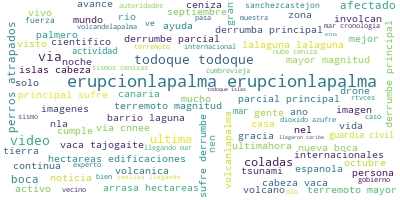

In [39]:
#!pip install gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in new_stop_words] for doc in texts]
data = tweets.text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
unique_string2=(" ").join([" ".join([str(item) for item in sublist]) for sublist in texts])
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(unique_string2)
# Visualize the word cloud
wordcloud.to_image()

In [40]:
from pprint import pprint
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"todoque" + 0.006*"volcanica" + 0.005*"noticias" + 0.005*"perros" + '
  '0.004*"via" + 0.003*"islas" + 0.003*"ceniza" + 0.003*"cientificos" + '
  '0.003*"ultima" + 0.003*"octubre"'),
 (1,
  '0.014*"todoque" + 0.007*"principal" + 0.005*"mar" + 0.004*"ceniza" + '
  '0.004*"derrumbe" + 0.004*"perros" + 0.003*"nueva" + 0.003*"hectareas" + '
  '0.003*"via" + 0.003*"volcanlapalma"'),
 (2,
  '0.048*"erupcionlapalma" + 0.009*"lalaguna" + 0.008*"laguna" + 0.007*"via" + '
  '0.007*"volcano" + 0.006*"terremoto" + 0.005*"ultima" + 0.005*"erupciones" + '
  '0.005*"espanola" + 0.004*"declarada"'),
 (3,
  '0.006*"principal" + 0.005*"hectareas" + 0.005*"video" + 0.005*"espanola" + '
  '0.004*"cenizas" + 0.004*"mayor" + 0.004*"actividad" + 0.004*"magnitud" + '
  '0.004*"terremoto" + 0.004*"via"'),
 (4,
  '0.008*"principal" + 0.007*"coladas" + 0.006*"derrumbe" + 0.005*"magnitud" + '
  '0.005*"sufre" + 0.005*"mayor" + 0.004*"actividad" + 0.004*"via" + '
  '0.004*"hectareas" + 0.004*"terremo

In [41]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.999528773231427

Coherence Score:  0.40480101752636105


In [42]:
def compute_coherence_values(corpus, dictionary, k, ):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100
                                           #chunksize=280,
                                           #passes=10
                                           )
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [43]:
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {
                 'Topics': [],
                 'Coherence': []
                }
for k in topics_range:
            # iterate through alpha values
            
        
    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, 
                                    k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)
   
pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)


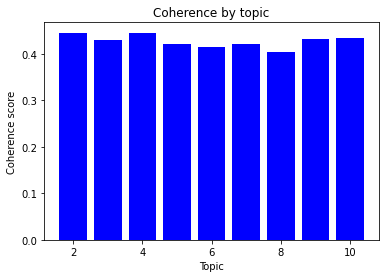

In [ ]:
topics = pd.read_csv("lda_tuning_results.csv")
topics.loc[:, ["Topics", "Coherence"]]
df = pd.DataFrame(topics)
#df.set_index('Topics')[['Coherence']].plot.bar()  
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title("Coherence by topic")
plt.xlabel("Topic")
plt.ylabel("Coherence score")
  
# Show the plot
plt.show()

In [ ]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:/Users/ivanl/OneDrive/Escritorio/EETAC/TFG/Test/big_data/code/proyecto/'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'C:/Users/ivanl/OneDrive/Escritorio/EETAC/TFG/Test/big_data/code/proyecto/'+ str(num_topics) +'topics_7_test.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.115514  0.009196       1        1  17.847540
2      0.010176 -0.054549       2        1  15.849749
1     -0.007406 -0.018879       3        1  13.877498
3     -0.091672  0.057834       4        1  13.571423
6     -0.033801 -0.089040       5        1  13.223486
0     -0.016584  0.015457       6        1  13.199332
5      0.023774  0.079981       7        1  12.430973, topic_info=                 Term        Freq       Total Category  logprob  loglift
694   erupcionlapalma  429.000000  429.000000  Default  30.0000  30.0000
402           todoque  189.000000  189.000000  Default  29.0000  29.0000
119            perros  216.000000  216.000000  Default  28.0000  28.0000
140             sufre   88.000000   88.000000  Default  27.0000  27.0000
1879        atrapados  126.000000  126.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
219              anos   12.963040   57.509798   Topic7  -6.1187   0.5951
127              etna   13.483540   67.807039   Topic7  -6.0793   0.4698
180             islas   14.406083   95.489154   Topic7  -6.0131   0.1936
1368        hectareas   14.760853  134.907405   Topic7  -5.9888  -0.1276
18            coladas   13.540947  134.621318   Topic7  -6.0751  -0.2118

[621 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6674      3  0.936554  aceleracion
4843      2  0.850934       active
100       1  0.185528    actividad
100       2  0.103896    actividad
100       3  0.126159    actividad
...     ...       ...          ...
551       3  0.068799         zona
551       4  0.126131         zona
551       5  0.091732         zona
551       6  0.240796         zona
551       7  0.114665         zona

[1595 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 4, 7, 1, 6])

In [ ]:
print(LDAvis_prepared.topic_info.to_csv("topic_mixture.csv"))


None
<built-in method count of PreparedData object at 0x0000023FB940AC80>


In [ ]:
from joblib import dump, load
dump(clf, 'filename.')